Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# OSCILACIJE (prigušene i prinudne)
## 22.03.2021. 

# Pavle Šarenac 2020/0359

### __Zadatak 1__: 
Posmatra se telo mase $m$ vezano za idealnu oprugu krutosti $k$, koje se kreće po glatkoj horizontalnoj podlozi duž $x$ ose. Na telo deluje otporna sila čiji je intenzitet srazmeran brzini $v$. Poznate su vrednosti sopstvene kružne učestanosti $\omega_0$, faktora prigušenja $\alpha$, početne pozicije u kojoj se nalazi telo $x_0$ i početne brzine $v_0$.

a) Formirati Python definiciju __prigusene__ koja modeluje zadati problem i omogućava rešavanje diferencijalne jednačine primenom integrate.odeint metode. Funkcija poziva parametre $\omega_0$ i $\alpha$.

In [38]:
def prigusene(pocetniUslov, vreme, omega0, alpha): # pocetniUslov = [y1, y2]; pozicija: y1 = x(t=0), brzina: y2 = v(t=0);
    y1, y2 = pocetniUslov
    return [y2, -(omega0**2)*y1 -2*alpha*y2]

# funkcija vraca vrednosti ciji integrali redom predstavljaju vrednosti pozicije i brzine tela tokom vremena
# postupak je sledeci
# jednacina prigusenog oscilatora izgleda ovako: 
# m*a = -k*x - b*v <-- otporna sila je Fot = -b*v, elasticna sila opruge je F = -k*x, obe sile usporavaju telo
# d^2x/dt^2 + b/m*dx/dt + k/m*x = 0 --> omega0^2 = k/m, alpha = b/2m
# d^2x/dt^2 + 2*alpha*dx/dt + omega0^2*x = 0
# posto python ne moze da resi diferencijalnu jednacinu drugog reda, pravim sistem od dve dif j-ne prvog reda sledecim smenama:
# y1 = x
# y2 = dx/dt

# dy1/dt = dx/dt = y2
# dy2/dt = d^2x/dt^2 = -omega0^2*x -2*alpha*dx/dt = -omega0^2*y1 -2*alpha*y2

# dakle, konacan sistem je sledeci:
# dy1/dt = y2
# dy2/dt = -omega0^2*y1 -2*alpha*y2

# sustina je da funkcija vrati desne strane ovih jednakosti kao povratne vrednosti jer kada se one integrale zapravo nalazimo
# koliko su y1 i y2, a znamo da je y1 = x(t) i y2 = dx(t)/dt = v(t) <-- pozicija i brzina tela tokom vremena

b) Napisati komande koje uvoze modul numpy, modul matplotlib.pyplot i funkciju za integraciju iz scipy modula.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


c) Definisati vrednosti sopstvene kružne učestanosti $ω_0 = 1$ rad/s, i listu četiri različite vrednosti koje uzima faktor prigušenja: $α_1 = ω_0$, $α_2 = ω_0/10$, $α_3 = 15ω_0$ i $α_4 = 0$. <br>
Definisati početne uslove: telo se u početnom trenutku nalazi na rastojanju $x_0 = 10$ m od ravnotežnog položaja i ima brzinu $v_0 = 20$ m/s.<br>
Definisati vremensku osu: $0$ do $60$ sekundi u $1000$ ekvidistantnih tačaka.

In [40]:
omega0 = 1
alpha = [omega0, omega0/10, omega0*15, 0]
pocetniUslov = [10, 20]
vreme = np.linspace(0, 60, 1000)

d) Napisati kod koji omogućava da se u okviru istog Figure prozora korišćenjem naredbe subplot, iscrtaju vremenski odzivi $x(t)$ za sve četiri vrednosti faktora prigušenja. Označiti ose grafika (“vreme [s]” i “x(t) [m]”). Na graficima prikazati legendu koja se odnosi na odgovarajuću vrednost faktora prigušenja $α$.<br>
_Da bi se prikazao grafik potrebno je izvršiti komandu plt.show()_

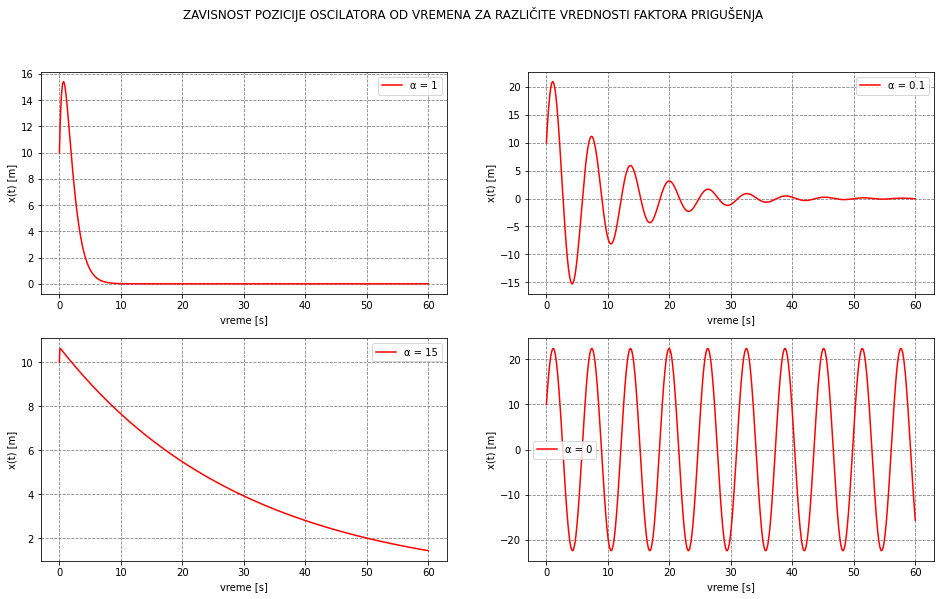

In [41]:
plt.figure(figsize=(16, 9))
plt.suptitle("ZAVISNOST POZICIJE OSCILATORA OD VREMENA ZA RAZLIČITE VREDNOSTI FAKTORA PRIGUŠENJA")

sol_1 = integrate.odeint(prigusene, pocetniUslov, vreme, args=(omega0, alpha[0]))
plt.subplot(2, 2, 1)
plt.plot(vreme, sol_1[:, 0], label="α = " + str(alpha[0]), color="red")
plt.legend()
plt.xlabel("vreme [s]")
plt.ylabel("x(t) [m]")
plt.grid(b=True, which="both", color="grey", linestyle="--")

sol_2 = integrate.odeint(prigusene, pocetniUslov, vreme, args=(omega0, alpha[1]))
plt.subplot(2, 2, 2)        
plt.plot(vreme, sol_2[:, 0], label="α = " + str(alpha[1]), color="red")
plt.legend()
plt.xlabel("vreme [s]")
plt.ylabel("x(t) [m]")
plt.grid(b=True, which="both", color="grey", linestyle="--")

sol_3 = integrate.odeint(prigusene, pocetniUslov, vreme, args=(omega0, alpha[2]))
plt.subplot(2, 2, 3)         
plt.plot(vreme, sol_3[:, 0], label="α = " + str(alpha[2]), color="red") 
plt.legend()
plt.xlabel("vreme [s]")
plt.ylabel("x(t) [m]")
plt.grid(b=True, which="both", color="grey", linestyle="--")

sol_4 = integrate.odeint(prigusene, pocetniUslov, vreme, args=(omega0, alpha[3]))
plt.subplot(2, 2, 4)         
plt.plot(vreme, sol_4[:, 0], label="α = " + str(alpha[3]), color="red") 
plt.legend()
plt.xlabel("vreme [s]")
plt.ylabel("x(t) [m]")
plt.grid(b=True, which="both", color="grey", linestyle="--")

plt.show()

e) Napisati kod koji omogućava da se u okviru istog Figure prozora korišćenjem naredbe subplot, iscrtaju fazni dijagrami za sve četiri vrednosti faktora prigušenja. Označiti ose grafika (“x [m]” i “v(t) [m/s]”). Na graficima prikazati legendu koja se odnosi na odgovarajuću vrednost faktora prigušenja  $α$ .

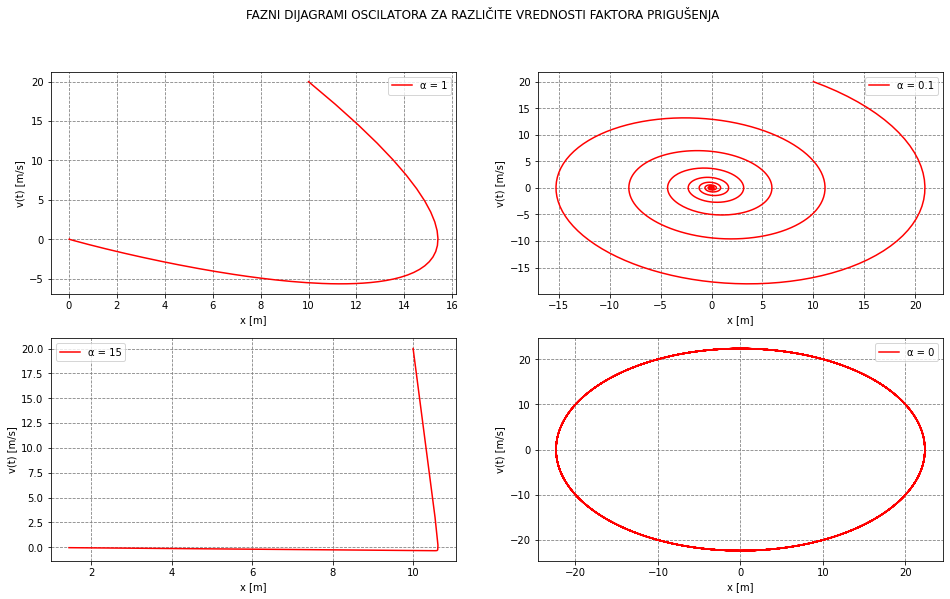

In [42]:
plt.figure(figsize=(16, 9))
plt.suptitle("FAZNI DIJAGRAMI OSCILATORA ZA RAZLIČITE VREDNOSTI FAKTORA PRIGUŠENJA")

plt.subplot(2, 2, 1)
plt.plot(sol_1[:, 0], sol_1[:, 1], label="α = " + str(alpha[0]), color="red")
plt.legend()
plt.xlabel("x [m]")
plt.ylabel("v(t) [m/s]")
plt.grid(b=True, which="both", color="grey", linestyle="--")

plt.subplot(2, 2, 2)
plt.plot(sol_2[:, 0], sol_2[:, 1], label="α = " + str(alpha[1]), color="red")
plt.legend()
plt.xlabel("x [m]")
plt.ylabel("v(t) [m/s]")
plt.grid(b=True, which="both", color="grey", linestyle="--")

plt.subplot(2, 2, 3)
plt.plot(sol_3[:, 0], sol_3[:, 1], label="α = " + str(alpha[2]), color="red")
plt.legend()
plt.xlabel("x [m]")
plt.ylabel("v(t) [m/s]")
plt.grid(b=True, which="both", color="grey", linestyle="--")

plt.subplot(2, 2, 4)
plt.plot(sol_4[:, 0], sol_4[:, 1], label="α = " + str(alpha[3]), color="red")
plt.legend()
plt.xlabel("x [m]")
plt.ylabel("v(t) [m/s]")
plt.grid(b=True, which="both", color="grey", linestyle="--")

plt.show()

f) Na osnovu prethodna četiri grafika odrediti tip oscilacija za svaku od vrednosti koeficijenta prigušenja. Proceniti vremenski trenutak u kom se dostiže stacionarno stanje (ako se dostiže) i navesti ga za svaki od prikazanih grafika. Dodatno, za svaki tip oscilacija prokomentarisati i ukratko prodiskutovati oblik faznog dijagrama.

Sopsvena kružna učestanost našeg oscilatora je ω0 = 1 rad/s, a u početnom trenutku telo je na rastojanju 10 m od ravnotežnog položaja i ima početnu brzinu 20 m/s.

Na prvom grafiku, koeficijent prigušenja je α = 1, dakle α = ω0, što znači da je reč o kritično prigušenim oscilacijama.
Ako pogledamo grafik zavisnosti pozicije oscilatora od vremena videćemo da oscilator dostiže stacionarno stanje posle otprilike 10 sekundi.
U ovakvom slučaju, sistem ne osciluje, već se iz neravnotežnog stanja vraća u ravnotežno za najkraće moguće vreme i nakon toga ostaje u ravnotežnom stanju. Na faznom dijagramu ovo možemo i videti, brzina tela opada do 0, pa onda malo raste ali je suprotan smer kretanja oscilatora, pa najzad ponovo opada da bi na kraju oscilator dostigao ravnotežno stanje.

Na drugom grafiku, koeficijent prigušenja je α = 0.1, dakle α < ω0, što znači da je reč o slabo prigušenim(kvazi-periodičnim) oscilacijama. 
Ako pogledamo grafik zavisnosti pozicije oscilatora od vremena videćemo da oscilator nije dostigao ravnotežno stanje ni posle 60 sekundi, već će negde kasnije dostići.
Zovu se ovako zato što amplituda oscilovanja nije konstantna, već opada vremenom prateći eksponencijalnu anvelopu. Smanjenje amplitude za 1 oscilaciju definisano je logaritamskim dekrementom. Kod slabo prigušenih oscilacija telo se dosta sporije vraća u ravnotežni položaj nego što je to slučaj kod kritično prigušenih oscilacija. Na faznom dijagramu se vidi lepo da je na početku brzina tela 20 m/s a elongacija je 10 m, a onda je u svakoj sledećoj oscilaciji amplituda brzine sve manja, međutim sa vremenskog dijagrama vidimo da oscilator nije još dostigao ravnotežno stanje posle 60 sekundi.

Na trećem grafiku, koeficijent prigušenja je α = 15 dakle α > 0, što znači da je reč o jako prigušenim oscilacijama.
Ako pogledamo grafik zavisnosti pozicije oscilatora od vremena videćemo da oscilator nije dostigao ravnotežno stanje ni posle 60 sekundi, već će negde kasnije dostići.
Sa faznog dijagrama jasno vidimo da nema oscilatornog kretanja jer je sistem preamortizovan - zato se ovo zove aperiodično kretanje. Brzina tela je u početnom trenutku 20 m/s  a elongacija 10 m. Brzina tela opada sve dok ne padne malo ispod nule, i vidimo da se od tog trenutka brzina polako približava nuli, a i telo polako ide ka ravnotežnom stanju.

Na četvrtom grafiku, koeficijent prigušenja je α = 0, što znači da je reč o linearnom harmonijskom oscilatoru bez prigušenja. To znači da će se telo kretati periodično sa konstantnom amplitudom jer nema spoljašnjih sila koje bi se suprotstavile njegovim oscilacijama.
Jasno je da linearni harmonijski oscilator nikada ne dostiže ravnotežno stanje.
Ovo vidimo i sa faznog dijagrama. Grafik je u obliku elipse i vidi se da se oscilator nikada ne zaustavlja, već mu se brzina povećava, smanjuje i menja znak jer oscilator menja i smer kretanja.

g) Napisati kod koji omogućava da se na istom dijagramu iscrtaju zavisnost kinetičke (plavom bojom) i potencijalne energije (crvenom bojom) sistema od vremena $t$ za faktor prigušenja $α = ω_0/10$, ako je masa tela koje osciluje $m = 1 $kg.

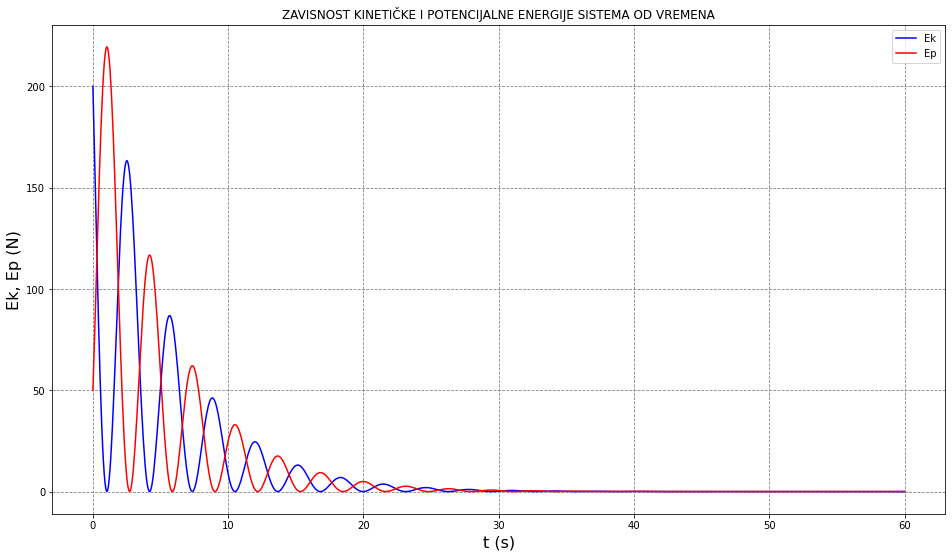

In [43]:
m = 1
alpha = omega0/10
k = (omega0**2)*m # jer je omega0^2 = k/m
sol = integrate.odeint(prigusene, pocetniUslov, vreme, args=(omega0, alpha))
# Ek = 1/2 * m * v^2
# Ep = 1/2 * k * x^2
Ek = 0.5*m*sol[:, 1]**2 # druga kolona matrice sol je array u kom su brzine oscilatora u svakom trenutku koji posmatramo
Ep = 0.5*k*sol[:, 0]**2 # prva kolona matrice sol je array u kom su pozicije oscilatora u svakom trenutku koji posmatramo

plt.figure(figsize=(16, 9))
plt.plot(vreme, Ek, color="blue", label="Ek")
plt.plot(vreme, Ep, color="red", label="Ep")
plt.xlabel("t (s)", size=16)
plt.ylabel("Ek, Ep (N)", size=16)
plt.title("ZAVISNOST KINETIČKE I POTENCIJALNE ENERGIJE SISTEMA OD VREMENA")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.legend()
plt.show()

h) Napisati kod koji omogućava da se iscrta zavisnost ukupne energije sistema za parametre kao u prethodnoj tački (tačka g)) i komentarisati dobijeni grafik. Zašto grafik nije glatka, opadajuća funkcija?

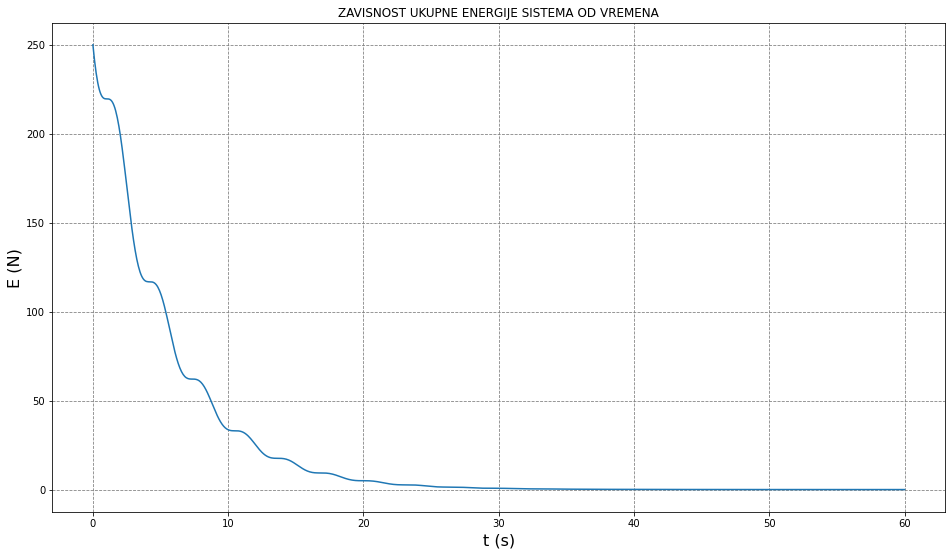

In [44]:
plt.figure(figsize=(16, 9))
plt.plot(vreme, Ek + Ep)
plt.ylabel("E (N)", size=16)
plt.xlabel("t (s)", size=16)
plt.title("ZAVISNOST UKUPNE ENERGIJE SISTEMA OD VREMENA")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.show()

Grafik nije glatka, opadajuća funkcija zbog nepreciznosti koje su posledica numeričkog rešavanja diferencijalnih jednačina.

### __Zadatak 2__: 
Posmatra se telo mase $m$ vezano za idealnu oprugu krutosti $k$, koje se kreće po glatkoj horizontalnoj podlozi duž $x$ ose. Na telo deluje otporna sila čiji je intenzitet srazmeran brzini $v$ i spoljašnja harmonijska sila amplitude $F_0$ i kružne učestanosti $Ω$ koja ima za cilj da kompenzuje disipaciju energije u ovom sistemu. Poznate su vrednosti sopstvene kružne učestanosti $ω_0$, faktora prigušenja $α$, početne pozicije u kojoj se nalazi telo $x_0$ i početne brzine $v_0$.

a) Formirati Python definiciju __prinudne__ koja modeluje zadati problem i omogućava rešavanje diferencijalne jednačine primenom integrate.odeint metode. Funkcija poziva parametre $\omega_0$, $\alpha$, $F_0$, $m$ i $Ω$.

In [45]:
def prinudne(pocetniUslov, vreme, omega0, alpha, F0, m, omega):
    y1, y2 = pocetniUslov # y1 = x(t=0), y2 = dx(t=0)/dt
    return [y2, F0/m*np.sin(omega*vreme) - (omega0**2)*y1 - 2*alpha*y2]
# dy1/dt = y2
# dy2/dt = F0/m*sin(omega*vreme) - omega0^2*y1 - 2*alpha*y2

b) Napisati komande koje uvoze modul numpy, modul matplotlib.pyplot i funkciju za integraciju iz scipy modula 

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

c) Poznate su vrednosti sopstvene kružne učestanosti $ω_0 = 10$ rad/s, faktora prigušenja $α = ω_0/20$, amplitude $F_0 = 20$ N i kružne učestanosti $Ω = 2$ rad/s prinudne sile. Masa tela je $m = 1$ kg.<br>
Definisati početne uslove: Telo u početnom trenutku miruje na rastojanju $x_0 = 10$ m od ravnotežnog položaja.<br>
Definisati vremensku osu: $0$ do $60$ sekundi u $6000$ ekvidistantnih tačaka.

In [47]:
omega0 = 10
alpha = omega0/20
F0 = 20
omega = 2
m = 1
pocetniUslov = [10, 0]
vreme = np.linspace(0, 60, 6000)

d) Napisati kod koji omogućava da se iscrta grafik vremenskog odziva $x(t)$. Označiti ose grafika (“vreme [s]” i “x(t) [m]”). 

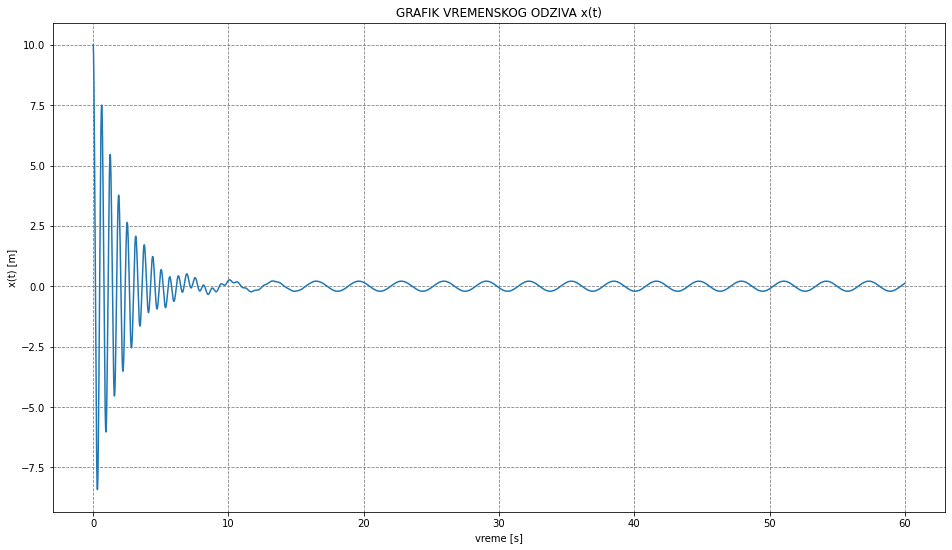

In [48]:
sol = integrate.odeint(prinudne, pocetniUslov, vreme, args=(omega0, alpha, F0, m, omega))
plt.figure(figsize=(16, 9))
plt.plot(vreme, sol[:, 0])
plt.xlabel("vreme [s]")
plt.ylabel("x(t) [m]")
plt.title("GRAFIK VREMENSKOG ODZIVA x(t)")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.show()

e) Napisati kod koji omogućava da se iscrta fazni dijagram $v(x)$. Označiti ose grafika (“x(t) [m]” i “v(t) [m/s]”). 

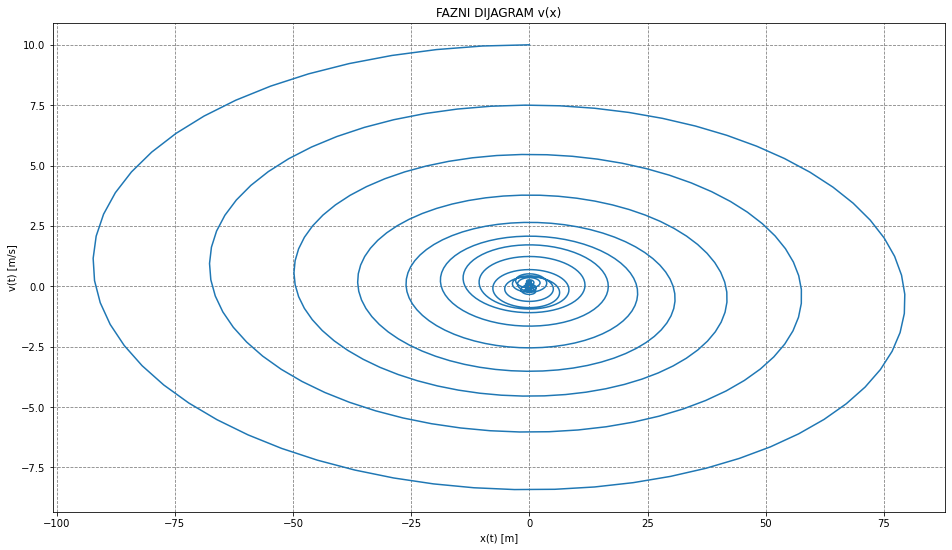

In [49]:
plt.figure(figsize=(16, 9))
plt.plot(sol[:, 1], sol[:, 0])
plt.xlabel("x(t) [m]")
plt.ylabel("v(t) [m/s]")
plt.title("FAZNI DIJAGRAM v(x)")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.show()

f) Šta se uočava na faznom dijagramu u trenutku kada u vremenskom odzivu preostaju samo oscilacije kao posledica prinudne sile? Napisati kod koji omogućava da se iscrta dodatni grafik, zumirani fazni dijagram, tako da limiti za $x$ osu budu od $-0.5$ do $0.5$, a za $y$ osu od $-1$ do $1$. 

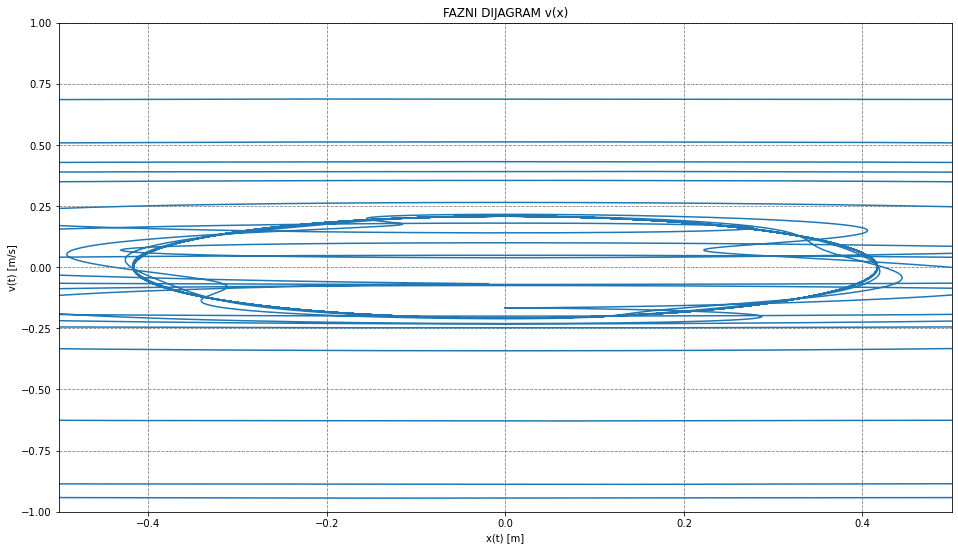

In [52]:
plt.figure(figsize=(16, 9))
plt.xlim(-0.5, 0.5)
plt.ylim(-1, 1)
plt.plot(sol[:, 1], sol[:, 0])
plt.xlabel("x(t) [m]")
plt.ylabel("v(t) [m/s]")
plt.title("FAZNI DIJAGRAM v(x)")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.show()

Sa faznog dijagrama se vidi da u trenutku kada nestane prigušenje i kretanje oscilatora uzrokuje samo prinudna sila, on nastavlja kretanje pod dejstvom konstantne prinudne sile i zato je u tom periodu fazni dijagram u obliku elipse.

g) Neka se frekvencija prinudne sile menja u opsegu frekvencija $Ω = [0, 2ω_0]$ sa korakom $ω_0/50$. Napisati kod koji omogućava da se iscrta amplitudska karaterisktika prinudnog odziva $A(Ω)$ koristeći se analitičkim izrazom za amplitudsku karakteristiku (sa slajdova). Označiti ose grafika (“učestanost prinudne sile” i “amplituda prinudnih oscilacija”). Prikazati legendu "analitička metoda".

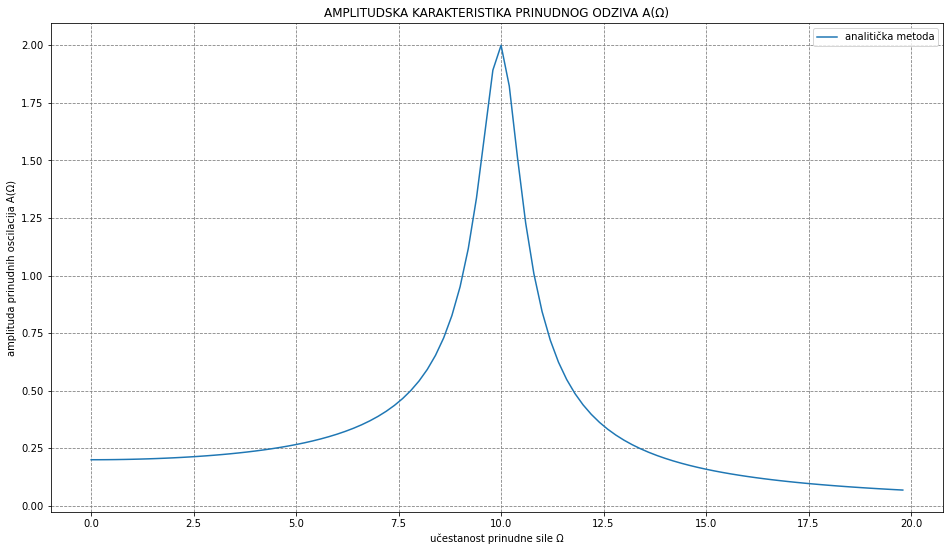

In [34]:
omega_analitical = np.arange(0, 2*omega0, omega0/50)
A = (F0/m)/(np.sqrt((omega0**2 - omega_analitical**2)**2 + (2*alpha*omega_analitical)**2))
plt.figure(figsize=(16, 9))
plt.plot(omega_analitical, A, label="analitička metoda")
plt.xlabel("učestanost prinudne sile Ω")
plt.ylabel("amplituda prinudnih oscilacija A(Ω)")
plt.title("AMPLITUDSKA KARAKTERISTIKA PRINUDNOG ODZIVA A(Ω)")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.legend()
plt.show()

h) Napisati kod koji omogućava numeričko određivanje amplitudske karakteristike. Iscrtati amplitudsku karaterisktiku dobijenu numeričkom metodom (isprekidanom crvenom linijom). Označiti ose grafika (“učestanost prinudne sile” i “amplituda prinudnih oscilacija”). Prikazati legendu "numerička metoda".<br>
_Hint:_ Rešiti jednačinu za svako $Ω$ iz opsega $[0, 2ω_0]$ na vremenskoj osi od $0$ do $300$ sekundi u $2000$ ekvidistantnih tačaka. Vremenska osa je produžena da bi bili sigurni da je sistem dostigao stacionarno stanje, tj. da je prelazni režim u kom postoje prigušene oscilacije završen. Amplituda oscilacija u stacionarnom odzivu se može naći kao maksimalni element niza na zadatom vremenskom intervalu. 

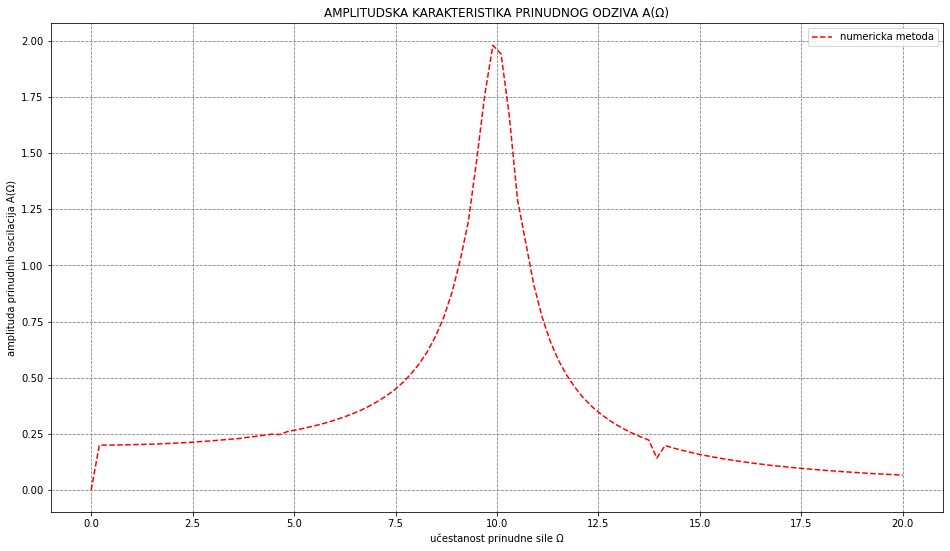

In [35]:
vreme = np.linspace(0, 300, 2000)
omega_numerical = np.linspace(0, 2*omega0, 100)
A_numerical = np.linspace(0, 1, 100)

for i in range(len(omega_numerical)):
    sol = integrate.odeint(prinudne, pocetniUslov, vreme, args=(omega0, alpha, F0, m, omega_numerical[i]))
    A_numerical[i] = np.max(sol[1900:1999, 0]) # uzimam max na intervalu od 1900 do 1999 jer je tad sigurno stacionarno stanje

plt.figure(figsize=(16, 9))
plt.plot(omega_numerical, A_numerical, label = "numericka metoda", color="red", linestyle="--")
plt.xlabel("učestanost prinudne sile Ω")
plt.ylabel("amplituda prinudnih oscilacija A(Ω)")
plt.title("AMPLITUDSKA KARAKTERISTIKA PRINUDNOG ODZIVA A(Ω)")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.legend()
plt.show()

i)	Napisati kod koji omogućava da se iz numerički dobijene amplitudske karakteristike odredi pri kojoj frekvenciji pobudne sile numerička kriva dostiže maksimalnu vrednost. Ova vrednost frekvencije naziva se rezonantna frekvencija. Prikazati numerički određenu vrednost za rezonantnu učestanost. Prikazati vrednost za rezonantnu učestanost koja se dobija na osnovu analitičkog izraza prikazanog na slajdovima. Izračunati relativno odstupanje za rezonantnu učestanost određenu numerički u odnosu na učestanost određenu na osnovu analitičkog izraza. 

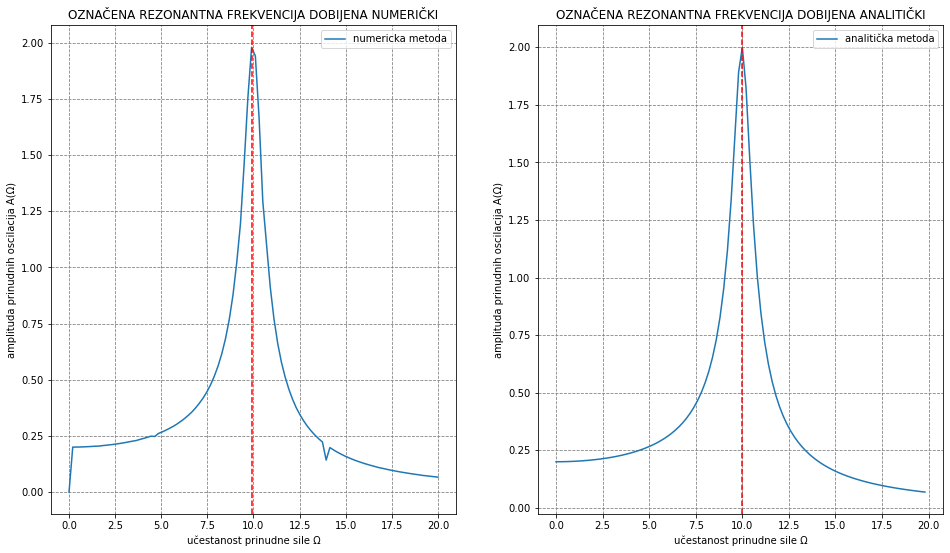

Relativno odstupanje za rezonantnu učestanost je: 0.0076169435


In [53]:
index = np.where(A_numerical == max(A_numerical)) 
resonantFrequency_numerical = omega_numerical[index]

plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.plot(omega_numerical, A_numerical, label = "numericka metoda")
plt.axvline(resonantFrequency_numerical, color="red", linestyle="--")
plt.xlabel("učestanost prinudne sile Ω")
plt.ylabel("amplituda prinudnih oscilacija A(Ω)")
plt.title("OZNAČENA REZONANTNA FREKVENCIJA DOBIJENA NUMERIČKI")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.legend()

resonantFrequency_analitical = np.sqrt(omega0**2 - 2*(alpha**2))

plt.subplot(1, 2, 2)
plt.plot(omega_analitical, A, label="analitička metoda")
plt.axvline(resonantFrequency_analitical, color="red", linestyle="--")
plt.xlabel("učestanost prinudne sile Ω")
plt.ylabel("amplituda prinudnih oscilacija A(Ω)")
plt.title("OZNAČENA REZONANTNA FREKVENCIJA DOBIJENA ANALITIČKI")
plt.grid(b=True, which="both", color="grey", linestyle="--")
plt.legend()
plt.show()

relativeError = np.abs((resonantFrequency_analitical - resonantFrequency_numerical)/resonantFrequency_analitical)
print("Relativno odstupanje za rezonantnu učestanost je: %.10f" %(relativeError[0]))